In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
np.random.seed(42)

df = pd.DataFrame(
    np.random.randint(1, 201, size=(100, 30)),
)


In [23]:
df_replace = df.mask((df >= 10) & (df <= 60))


In [24]:
rows = df_replace.isnull().sum(axis = 1)
cols = df_replace.isnull().sum(axis = 0)
rows,cols

(0      7
 1     11
 2      8
 3      9
 4      8
       ..
 95    10
 96     9
 97     9
 98     7
 99    10
 Length: 100, dtype: int64,
 0     23
 1     22
 2     21
 3     18
 4     26
 5     28
 6     23
 7     27
 8     21
 9     17
 10    26
 11    24
 12    23
 13    28
 14    23
 15    34
 16    31
 17    31
 18    34
 19    20
 20    24
 21    26
 22    23
 23    31
 24    27
 25    26
 26    31
 27    27
 28    31
 29    31
 dtype: int64)

In [30]:
df_filled = df_replace.fillna(df_replace.mean())


In [31]:
df_filled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,103.000000,180.000000,93.000000,127.792683,107.000000,72.000000,189.000000,110.739726,103.000000,122.0,...,88.000000,158.000000,124.766234,130.000000,192.000000,188.000000,121.869565,161.000000,118.652174,127.724638
1,89.000000,124.448718,110.063291,170.000000,188.000000,121.069444,190.000000,190.000000,175.000000,190.0,...,125.447368,132.000000,89.000000,123.797101,124.479452,9.000000,90.000000,121.863014,130.000000,84.000000
2,92.000000,111.000000,188.000000,199.000000,172.000000,8.000000,175.000000,110.739726,81.000000,164.0,...,146.000000,123.094595,162.000000,190.000000,124.479452,95.000000,121.869565,121.863014,200.000000,190.000000
3,130.116883,82.000000,111.000000,127.792683,120.810811,154.000000,188.000000,124.000000,123.556962,157.0,...,139.000000,81.000000,136.000000,163.000000,163.000000,125.405405,123.000000,5.000000,118.652174,127.724638
4,135.000000,72.000000,110.063291,162.000000,120.810811,121.069444,151.000000,62.000000,123.556962,99.0,...,103.000000,123.094595,137.000000,123.797101,90.000000,125.405405,124.000000,179.000000,63.000000,96.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,164.000000,140.000000,91.000000,2.000000,118.000000,121.069444,181.000000,160.000000,95.000000,144.0,...,153.000000,123.094595,78.000000,124.000000,114.000000,125.405405,158.000000,172.000000,118.652174,179.000000
96,174.000000,113.000000,120.000000,149.000000,122.000000,121.069444,119.000000,110.739726,123.556962,175.0,...,86.000000,150.000000,89.000000,123.797101,92.000000,125.405405,121.869565,2.000000,118.652174,180.000000
97,130.116883,124.448718,95.000000,151.000000,88.000000,121.069444,129.194805,171.000000,165.000000,189.0,...,108.000000,111.000000,124.766234,128.000000,111.000000,136.000000,106.000000,186.000000,144.000000,72.000000
98,129.000000,108.000000,5.000000,3.000000,193.000000,132.000000,104.000000,64.000000,106.000000,98.0,...,164.000000,86.000000,90.000000,123.797101,124.479452,125.405405,121.869565,121.000000,162.000000,181.000000


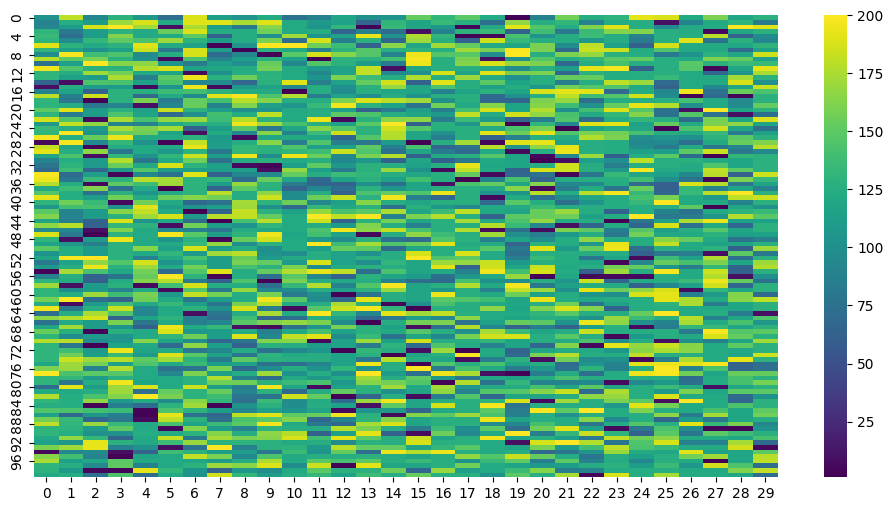

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_filled, cmap="viridis")
plt.show()

In [33]:
corr = df_filled.corr().abs()


In [34]:
cols_count = (corr.mean() <= 0.7).sum()
cols_count

np.int64(30)

In [35]:
df_norm = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10

In [36]:
df_norm.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,5.102041,8.963731,4.595960,6.385415,5.329949,3.585859,9.641026,5.514559,5.179487,6.102564,...,4.416244,7.889447,6.161543,6.548223,9.639175,9.390863,6.073847,8.080808,5.849601,6.562815
1,4.387755,6.085426,5.457742,8.527919,9.441624,6.064113,9.692308,9.497487,8.871795,9.589744,...,6.317125,6.582915,4.336735,6.233355,6.158735,0.304569,4.472362,6.104193,6.428571,4.224599
2,4.540816,5.388601,9.393939,10.000000,8.629442,0.353535,8.923077,5.514559,4.051282,8.256410,...,7.360406,6.135407,8.061224,9.593909,6.158735,4.670051,6.073847,6.104193,10.000000,9.893048
3,6.485555,3.886010,5.505051,6.385415,6.031006,7.727273,9.589744,6.180905,6.233690,7.897436,...,7.005076,4.020101,6.734694,8.223350,8.144330,6.213472,6.130653,0.202020,5.849601,6.562815
4,6.734694,3.367876,5.457742,8.121827,6.031006,6.064113,7.692308,3.065327,6.233690,4.923077,...,5.177665,6.135407,6.785714,6.233355,4.381443,6.213472,6.180905,8.989899,3.010204,4.866310
5,6.485555,4.611399,6.565657,7.563452,7.157360,8.585859,6.574093,5.514559,6.233690,8.051282,...,6.317125,6.135407,5.306122,6.233355,4.072165,6.213472,9.497487,3.737374,6.326531,4.652406
6,9.540816,6.321244,6.010101,6.385415,9.543147,6.060606,5.897436,0.100503,5.179487,10.000000,...,8.071066,4.773869,8.979592,5.685279,2.938144,9.289340,6.073847,6.104193,5.849601,6.684492
7,6.530612,5.492228,5.000000,5.634518,9.238579,4.040404,9.538462,5.628141,0.000000,6.512821,...,8.071066,3.366834,9.132653,9.289340,6.082474,7.208122,6.073847,6.104193,3.316327,5.935829
8,4.846939,9.896373,6.919192,7.208122,4.822335,6.212121,9.538462,3.467337,4.666667,0.000000,...,6.317125,8.040201,8.367347,6.446701,6.158735,4.010152,5.175879,6.464646,5.849601,9.625668
9,8.928571,7.461140,7.929293,6.385415,4.923858,0.303030,7.333333,4.472362,5.641026,6.410874,...,7.411168,6.135407,6.479592,7.461929,7.577320,6.213472,5.979899,8.080808,7.551020,5.935829


In [37]:
df_binary = df_norm.mask(df_norm <= 5, 0).mask(df_norm > 5, 1)

In [38]:
df_binary

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
97,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
98,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


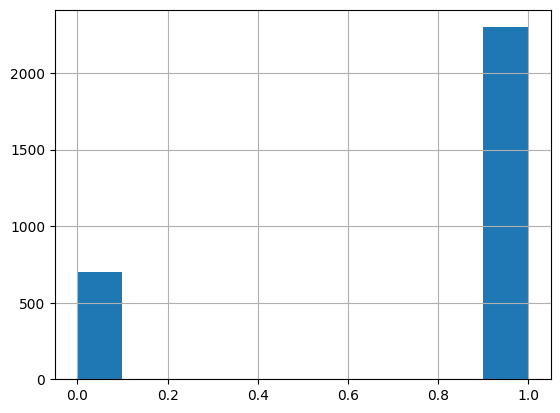

In [40]:
df_binary.stack().hist()
plt.show()